In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [112]:
car <- read.csv("./teamSave//data.csv")

In [111]:
library(stringr)
library(dplyr)

In [55]:
head(car)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500,2.0 V6 TB
2,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,,- (g/km),190000,"Q4 Allrad, 3.2L GTA"
3,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,,- (g/km),129000,ALFA ROME 916
4,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500,2.0 16V Twin Spark L
5,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127,"3.0i Super V6, absoluter Topzustand !"
6,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307,2.0 16V Twin Spark


In [121]:
write.csv(mycar, file = "./teamSave/mycar.csv", row.names = FALSE)

In [ ]:




subset(car, car$transmission_type == '')

# 1 타겟선정.
 - 중고차 시세 예측 앱을 만들기 때문에 가격(price_in_euro) 를 target 컬럼으로 선정한다.

2 피쳐 선정.
- 색깔 선정 

In [113]:
# 색깔 분포도
table(car$color)


        beige  black   blue bronze  brown   gold  green   grey orange    red 
   166   2420  58720  32092    586   4415    580   3500  46786   3367  21258 
silver violet  white yellow 
 34362    408  40640   1779 

In [114]:
# 크기순으로 정렬해서 제일 큰 값들 확인
# 방법 1 . 가장 많은 색깔로 NA 값을 채운다.
# 방법 2 . 가장 많은 색깔 들을 선별해 그 색깔의 비율대로 집어넣는다.
sort(table(car$color), decreasing = T)


 black   grey  white silver   blue    red  brown  green orange  beige yellow 
 58720  46786  40640  34362  32092  21258   4415   3500   3367   2420   1779 
bronze   gold violet        
   586    580    408    166 

In [115]:
# 원하는 브랜드만으로 데이터셋 생성
volvo <- subset(car, car$brand =='volvo')
toyota <- subset(car, car$brand =='toyota')
benz <- subset(car, car$brand =='mercedes-benz')
audi <- subset(car, car$brand =='audi')
kia <- subset(car, car$brand =='kia')
bmw <- subset(car, car$brand =='bmw')
hyundai <- subset(car, car$brand =='hyundai')
ford <- subset(car, car$brand =='ford')

In [116]:
mycar <- rbind(volvo,toyota,benz,audi,kia,bmw,hyundai,ford)

In [117]:
sort(table(mycar$color) ,decreasing = T)


 black   grey silver  white   blue    red  brown  green orange yellow  beige 
 26191  19931  19601  18098  14130   7666   1843   1288    891    860    800 
bronze   gold violet        
   330    268    143     62 

In [118]:
# 비어있는 컬러값을 가장많은 색인 블랙으로 변경
mycar$color <- ifelse(mycar$color == '' , 'black' , mycar$color)

In [119]:
table(mycar$color)

colornum <- as.numeric(factor(mycar$color))



 beige  black   blue bronze  brown   gold  green   grey orange    red silver 
   800  26253  14130    330   1843    268   1288  19931    891   7666  19601 
violet  white yellow 
   143  18098    860 

In [120]:
table(is.na(mycar$price_in_euro))


 FALSE 
112102 

In [110]:
head(subset(mycar, mycar$fuel_consumption_l_100km =='' ))
table(mycar$fuel_consumption_l_100km =='' )


,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
246927,246926,volvo,Volvo V70,blue,12/2000,2000,3000,125,170,Manual,Petrol,,0 g/km,337000,"7 Sitze.,Klima,Ahk.,Temp.,Leder,Sitzheiz.,Tüv 05/2"
247008,247007,volvo,Volvo XC60,black,06/2009,2009,10900,136,185,Automatic,Diesel,,0 g/km,198000,"2.4 D5 AWD, gepflegt, unfallfrei"
247042,247041,volvo,Volvo V50,black,05/2010,2010,9980,80,109,Manual,Diesel,,0 g/km,112000,"Leder,Navi,SD"
247068,247067,volvo,Volvo XC90,black,08/2011,2011,18997,147,200,Automatic,Diesel,,0 g/km,173000,D5 EDITION Geartronic / 7-SITZER / XENON
247125,247124,volvo,Volvo S60,black,10/2012,2012,17990,120,163,Automatic,Diesel,,0 g/km,269000,D4 AT Leder NAVI Xenon Summum Scheckheftgepflegt
247200,247199,volvo,Volvo XC60,brown,12/2014,2014,20890,133,181,Manual,Diesel,,0 g/km,98000,Summum / Leder / Panorama / Navi/ Bi Xenon



FALSE  TRUE 
88300  5460 

In [ ]:
help()

In [106]:
nrow(mycar)
mycar$fuel_consumption_l_100km == '' 


[1] 93760

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
246918,246917,volvo,Volvo V70,blue,05/1997,1997,1450,132,179,Manual,Petrol,10 l/100 km,237 g/km,286460,2.0 T
246923,246922,volvo,Volvo S80,beige,10/1999,1999,3799,150,204,Automatic,Petrol,"9,7 l/100 km",232 g/km,188500,2.9 TÜV NEU / NAVI / LEDER / wenig KM
246925,246924,volvo,Volvo C70,blue,09/2000,2000,3999,142,193,Automatic,Petrol,11 l/100 km,261 g/km,264313,"2.4 T (Bi-Colour-Leder, Klimaauto.) Text lesen!"
246927,246926,volvo,Volvo V70,blue,12/2000,2000,3000,125,170,Manual,Petrol,,0 g/km,337000,"7 Sitze.,Klima,Ahk.,Temp.,Leder,Sitzheiz.,Tüv 05/2"
246929,246928,volvo,Volvo V40,blue,05/2000,2000,1000,100,136,Manual,Petrol,"8,3 l/100 km",198 g/km,267000,2
246931,246930,volvo,Volvo S80,blue,07/2000,2000,4980,132,179,Automatic,Petrol,"9,4 l/100 km",225 g/km,227568,2.0T Business
246933,246932,volvo,Volvo V70,blue,12/2000,2000,1480,103,140,Manual,Petrol,"9,1 l/100 km",217 g/km,353090,Kombi 2.4
246934,246933,volvo,Volvo V70,blue,04/2000,2000,700,103,140,Automatic,Diesel,"6,3 l/100 km",168 g/km,330000,2.5 D
246936,246935,volvo,Volvo V40,blue,05/2001,2001,3999,100,136,Manual,Petrol,"8,3 l/100 km",197 g/km,141900,Kombi 2.0 16V*KLIMA*ALU*TEILLEDER*TÜV


In [109]:
subset(mycar, mycar$fuel_consumption_l_100km == '' | mycar$fuel_consumption_l_100km == NA | mycar$fuel_con)

,X,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
246927,246926,volvo,Volvo V70,blue,12/2000,2000,3000,125,170,Manual,Petrol,,0 g/km,337000,"7 Sitze.,Klima,Ahk.,Temp.,Leder,Sitzheiz.,Tüv 05/2"
247008,247007,volvo,Volvo XC60,black,06/2009,2009,10900,136,185,Automatic,Diesel,,0 g/km,198000,"2.4 D5 AWD, gepflegt, unfallfrei"
247042,247041,volvo,Volvo V50,black,05/2010,2010,9980,80,109,Manual,Diesel,,0 g/km,112000,"Leder,Navi,SD"
247068,247067,volvo,Volvo XC90,black,08/2011,2011,18997,147,200,Automatic,Diesel,,0 g/km,173000,D5 EDITION Geartronic / 7-SITZER / XENON
247125,247124,volvo,Volvo S60,black,10/2012,2012,17990,120,163,Automatic,Diesel,,0 g/km,269000,D4 AT Leder NAVI Xenon Summum Scheckheftgepflegt
247200,247199,volvo,Volvo XC60,brown,12/2014,2014,20890,133,181,Manual,Diesel,,0 g/km,98000,Summum / Leder / Panorama / Navi/ Bi Xenon
247216,247215,volvo,Volvo V60,black,08/2014,2014,19900,158,215,Automatic,Diesel Hybrid,,50 km Reichweite,159336,T2 You
247394,247393,volvo,Volvo S90,blue,09/2016,2016,26888,140,190,Automatic,Diesel,,0 g/km,50152,"Lim. Momentum,Top-Ausstattung,AHK,SSD"
247403,247402,volvo,Volvo V90,blue,12/2016,2016,19980,173,235,Automatic,Diesel,,129 g/km,169730,D5 AWD Momentum Leder Navi Pano LED


In [102]:
mycar  <- subset(mycar, mycar$fuel_consumption_l_100km != '- (l/100 km)' & mycar$fuel_consumption_g_km != '- (g/km)')

table(mycar$fuel_consumption_l_100km == '- (l/100 km))')
table(mycar$fuel_consumption_g_km == '- (g/km)	')


FALSE 
93760 


FALSE 
93760 

In [108]:
table(mycar$price_in_euro)


                      Navigation                  + Technik-Paket 
                               1                                1 
                258 PS TÜV 07/24                     4-J.GARANTIE 
                               1                                1 
      4x4 mit hoher Anhängelast*         5-türig! Klima! TÜV neu! 
                               1                                1 
                       8 x Räder                         8xREIFEN 
                               1                                1 
             AC-Schnitzer 360 PS                              AHK 
                               1                                1 
                        Airscarf                    Apple Carplay 
                               1                                1 
                       ASR-Modul                           Autom. 
                               1                                1 
           AzV und Fahrradträger                   BlueEFFICI

In [32]:
par(bg = "white")
barplot( head(arrange(mycar,desc(color))),3)

ERROR: Error in barplot.default(head(arrange(mycar, desc(color))), 3): 'height'는 반드시 벡터 또는 행렬이어야 합니다


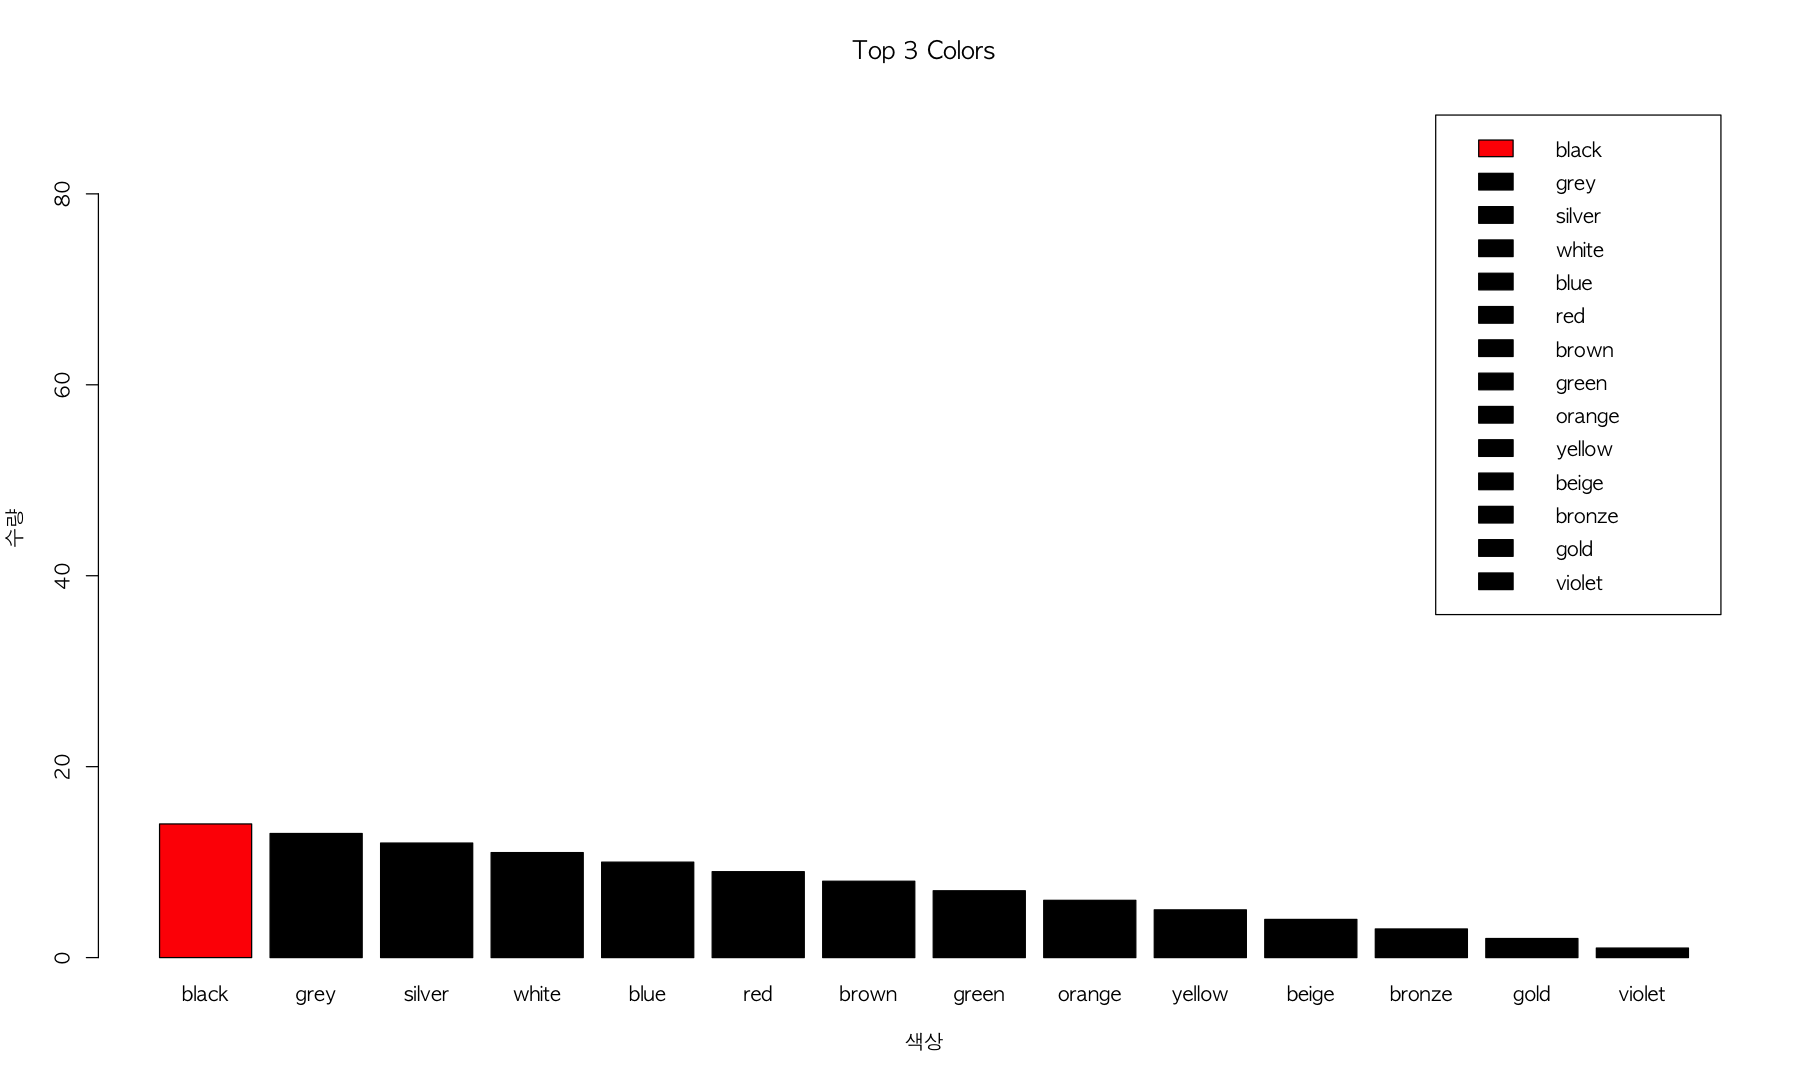

In [88]:
options(scipen = 100)
par(family = "AppleGothic", bg = 'white') 
# 색깔의 빈도수 계산
color_counts <- table(mycar$color)

# 색깔의 순위 계산
color_ranks <- rank(color_counts)  # 높은 빈도수 순으로 순위 부여

# 가장 많은 색깔 3개 선택
top_colors <- names(sort(color_counts, decreasing = TRUE)[1:14])

# 선택된 색깔에 대한 순위 추출
top_ranks <- color_ranks[top_colors]

# 막대 그래프 그리기
barplot(top_ranks, names.arg = top_colors, col = c("red",rep("black",13)),
 main = "Top 3 Colors",
 xlab = '색상',
 ylab = '수량',
 ylim = c(0,90),
	legend.text = T,

 )


 

In [76]:
top_ranks

black   grey silver 
    14     13     12

beige  black   blue bronze  brown   gold  green   grey orange    red silver 
     4     14     10      3      8      2      7     13      6      9     12 
violet  white yellow 
     1     11      5

In [79]:
max(table(mycar$color)) + 2000

[1] 26253